In [4]:
import pandas as pd

# Read the CSV file
file_path = 'DataDummyPsikografi_15000_v1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


                                  Produk sering beli  \
0  Buku Non-Fiksi (Pengembangan Diri, Bisnis, dll...   
1                                 Komik/Novel Grafis   
2                                      Alat Olahraga   
3                            Mainan/Collectible item   
4  Jurnal/Perencana (Planner); Buku Non-Fiksi (Pe...   

                         Saluran belanja  \
0                  Aplikasi Gramedia.com   
1  Marketplace (Shopee, Tokopedia, dll.)   
2                   Website Gramedia.com   
3      Aplikasi Gramedia Digital (ebook)   
4                          Toko Gramedia   

                            Motivasi utama pembelian  \
0  Menambah pengetahuan; Kebutuhan pekerjaan/seko...   
1   Sebagai bentuk 'self-reward' atau apresiasi diri   
2  Hiburan atau relaksasi; Kebutuhan pekerjaan/se...   
3  Untuk mengekspresikan kreativitas; Mendukung h...   
4  Sebagai bentuk 'self-reward' atau apresiasi di...   

                                                Hobi  \
0    

In [6]:
import pandas as pd

def preprocess_for_svkmodes(df):
    # --- Step 1: Define your mapping dictionaries ---
    produk_map = {
        'Novel Fiksi': 'Novel Fiksi',
        'Buku Non-Fiksi (Pengembangan Diri, Bisnis, dll.)': 'Buku Non-Fiksi',
        'Buku Pelajaran/Edukasi (Termasuk Latihan Soal, Kamus)': 'Edukasi',
        'Komik/Novel Grafis': 'Komik',
        'Buku Anak': 'Buku Anak',
        'Perlengkapan Seni/Kreatif': 'Alat Seni',
        'Alat Musik': 'Alat Seni',
        'Alat Tulis Umum (Kantor/Sekolah)': 'Alat Kantor/Sekolah',
        'Jurnal/Perencana (Planner)': 'Alat Kantor/Sekolah',
        'Perlengkapan Kantor atau Sekolah': 'Alat Kantor/Sekolah',
        'Mainan/Collectible item': 'Sport & mainanan',
        'Alat Olahraga': 'Sport & mainanan'
    }

    hobi_map = {
        'Membaca buku atau majalah': 'Literasi',
        'Menulis (diari, blog, atau lainnya)': 'Literasi',
        'Melukis atau menggambar': 'Seni',
        'Bermain musik': 'Seni',
        'Bermain game (offline/online)': 'Aktivitas Rekreasional',
        'Olahraga': 'Aktivitas Rekreasional',
        'Menghadiri acara budaya atau edukasi': 'Aktivitas Rekreasional',
        'Belanja online/offline': 'Lifestyle',
        'Travelling': 'Lifestyle'
    }

    minat_map = {
        'Buku fiksi (novel, komik, buku anak)': 'edukasi',
        'Buku non-fiksi (pengembangan diri, sejarah, agama)': 'edukasi',
        'Buku Edukasi (Buku Teks, Latihan Soal, Kamus)': 'edukasi',
        'Alat Musik & kesenian': 'Alat Seni',
        'Mainan': 'Self Wear',
        'Alat Olahraga': 'Self Wear',
        'Alat Tulis kantor atau sekolah': 'Daily needs',
        'Kesehatan dan Kecantikan': 'Self Wear'
    }

    set_cols = ['Produk sering beli', 'Motivasi utama pembelian', 'Hobi', 'Minat']
    map_dicts = {
        'Produk sering beli': produk_map,
        'Hobi': hobi_map,
        'Minat': minat_map
    }

    df_cleaned = df.copy()

    for col in set_cols:
        df_cleaned[col] = df_cleaned[col].apply(lambda x: set(
            map(
                lambda v: map_dicts[col].get(v.strip(), v.strip()) if col in map_dicts else v.strip(),
                str(x).split(";")
            )
        ))

    return df_cleaned


if __name__ == "__main__":
    # Preprocess
    df_processed = preprocess_for_svkmodes(df)

    # Convert set columns to string for CSV saving
    for col in ['Produk sering beli', 'Motivasi utama pembelian', 'Hobi', 'Minat']:
        df_processed[col] = df_processed[col].apply(lambda s: "; ".join(sorted(s)))

    # Save to CSV
    output_file = "Preprocessed_SVKModes_Ready_15000.csv"
    df_processed.to_csv(output_file, index=False, encoding="utf-8")
    print(f"✅ Preprocessed data saved to: {output_file}")



✅ Preprocessed data saved to: Preprocessed_SVKModes_Ready_15000.csv


In [1]:
import pandas as pd


def load_csv_as_set_valued(csv_path):
    df = pd.read_csv(csv_path)
    for col in df.columns:
        df[col] = df[col].apply(lambda x: set(item.strip() for item in str(x).split(";") if item.strip()))
    return df

# Example:
file_path = "10,000_data/DataDummyPsikografi_10,000_v3.csv"
df_set_valued = load_csv_as_set_valued(file_path)
print(df_set_valued.head())
features = list(df_set_valued.columns)

                                  Produk sering beli  \
0  {Buku Anak, Buku Non-Fiksi (Pengembangan Diri,...   
1                               {Komik/Novel Grafis}   
2                                    {Alat Olahraga}   
3                          {Mainan/Collectible item}   
4  {Perlengkapan Kantor atau Sekolah, Buku Non-Fi...   

                  Saluran belanja  \
0         {Aplikasi Gramedia.com}   
1          {Website Gramedia.com}   
2  {Toko buku independen lainnya}   
3         {Aplikasi Gramedia.com}   
4          {Website Gramedia.com}   

                            Motivasi utama pembelian  \
0         {Kado atau hadiah, Hiburan atau relaksasi}   
1  {Hiburan atau relaksasi, Untuk mengekspresikan...   
2  {Kado atau hadiah, Hiburan atau relaksasi, Men...   
3  {Kado atau hadiah, Untuk mengekspresikan kreat...   
4                {Untuk mengekspresikan kreativitas}   

                                                Hobi  \
0                    {Bermain game (offline/onl

In [3]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from itertools import combinations
from sklearn.metrics import silhouette_score
import random

# ------------------------
# Helper to make dict with set values hashable
# ------------------------
def make_hashable(d):
    return tuple((k, frozenset(v)) for k, v in d.items())

# ------------------------
# Jaccard distance function for set-valued data
# ------------------------
def jaccard_distance(set1, set2):
    return 1 - len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0

def jaccard_distance_object(x, y):
    return np.mean([jaccard_distance(x[f], y[f]) for f in x])

# ------------------------
# Compute density of an object
# ------------------------
def compute_density(x, data, features):
    total_dist = sum(jaccard_distance_object(x, other) for other in data if other != x)
    return 1 / (1 + total_dist)

# ------------------------
# GICCA Initialization (Algorithm 4)
# ------------------------
def gicca_initialization(data, k, features):
    centers = []
    densities = {make_hashable(d): compute_density(d, data, features) for d in data}

    # Step 1: Choose the densest object
    first_center = max(data, key=lambda d: densities[make_hashable(d)])
    centers.append(first_center)

    # Step 2+: Select next center based on min-distance * density
    while len(centers) < k:
        candidates = []
        for d in data:
            if d in centers:
                continue
            min_dist = min(jaccard_distance_object(d, c) for c in centers)
            candidates.append((min_dist * densities[make_hashable(d)], d))
        next_center = max(candidates, key=lambda x: x[0])[1]
        centers.append(next_center)
    return centers

# ------------------------
# HAFSM: Compute centroid of a cluster (Algorithm 3)
# ------------------------
def hafsm(cluster, features):
    centroid = {}
    for feature in features:
        value_counts = Counter()
        for obj in cluster:
            for val in obj[feature]:
                value_counts[val] += 1 / len(obj[feature])

        sorted_vals = sorted(value_counts.items(), key=lambda x: -x[1])
        values = [val for val, _ in sorted_vals]

        r = round(np.mean([len(obj[feature]) for obj in cluster]))

        if r == 1:
            centroid[feature] = {values[0]}
        else:
            fr = value_counts[values[r - 1]]
            fr_next = value_counts[values[r]] if r < len(values) else -1

            if fr > fr_next:
                centroid[feature] = set(values[:r])
            else:
                p = 0
                while (
                    r - p - 1 >= 0
                    and r + p < len(values)
                    and value_counts[values[r - p - 1]] == value_counts[values[r + p]]
                ):
                    p += 1
                tied_vals = values[r - p : r + p + 1]
                combos = list(combinations(tied_vals, p + 1))

                base_vals = values[: r - p - 1]
                max_sum = -1
                best_combo = None
                for combo in combos:
                    combo_sum = sum(value_counts[val] for val in combo)
                    if combo_sum > max_sum:
                        max_sum = combo_sum
                        best_combo = combo

                centroid[feature] = set(base_vals + list(best_combo))
    return centroid

# ------------------------
# Assign clusters and compute total cost
# ------------------------
def assign_clusters(data, centers):
    clusters = defaultdict(list)
    cost = 0
    for obj in data:
        distances = [jaccard_distance_object(obj, c) for c in centers]
        best_idx = np.argmin(distances)
        clusters[best_idx].append(obj)
        cost += distances[best_idx]
    return clusters, cost

# ------------------------
# Main SV-k-Modes algorithm
# ------------------------
def sv_k_modes(data, k, features, max_iter=100):
    centers = gicca_initialization(data, k, features)
    prev_cost = None

    for _ in range(max_iter):
        clusters, cost = assign_clusters(data, centers)
        if prev_cost is not None and abs(prev_cost - cost) < 1e-4:
            break
        prev_cost = cost
        new_centers = []
        for i in range(k):
            cluster_data = clusters[i]
            if cluster_data:
                new_centers.append(hafsm(cluster_data, features))
            else:
                new_centers.append(random.choice(data))  # reassign if cluster empty
        centers = new_centers

    return clusters, centers, cost

# ------------------------
# Silhouette score using Jaccard distance
# ------------------------
def compute_silhouette(data, labels, features):
    def to_vector(obj):
        return [obj[feat] for feat in features]

    vectors = [to_vector(obj) for obj in data]

    def pairwise_jaccard(X):
        n = len(X)
        dist_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(i + 1, n):
                dist = np.mean([jaccard_distance(X[i][f], X[j][f]) for f in range(len(X[i]))])
                dist_matrix[i, j] = dist_matrix[j, i] = dist
        return dist_matrix

    dist_matrix = pairwise_jaccard(vectors)
    return silhouette_score(dist_matrix, labels, metric="precomputed")


In [6]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from itertools import combinations
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MultiLabelBinarizer
import random

# ------------------------
# Fast Encode set-valued categorical data into binary vectors
# ------------------------
def encode_data(df):
    print("▶ encode_data_fast()")
    mlbs = {}
    encoded_cols = []
    for col in df.columns:
        mlb = MultiLabelBinarizer(sparse_output=False)
        col_enc = mlb.fit_transform(df[col])
        mlbs[col] = mlb
        encoded_cols.append(col_enc)
    X = np.hstack(encoded_cols)
    feature_indices = {}
    offset = 0
    for col in df.columns:
        classes = mlbs[col].classes_
        feature_indices[col] = {val: offset + i for i, val in enumerate(classes)}
        offset += len(classes)
    print("◀ encode_data_fast()")
    return X, feature_indices

# ------------------------
# Jaccard distances
# ------------------------
def pairwise_jaccard_vectorized(X):
    print("▶ pairwise_jaccard_vectorized()")
    intersection = np.dot(X, X.T)
    row_sums = X.sum(axis=1)
    union = row_sums[:, None] + row_sums[None, :] - intersection
    with np.errstate(divide='ignore', invalid='ignore'):
        jaccard = 1.0 - intersection / union
        jaccard[union == 0] = 0.0
    print("◀ pairwise_jaccard_vectorized()")
    return jaccard


def pairwise_jaccard_cross(X1, X2):
    print("▶ pairwise_jaccard_cross()")
    intersection = np.dot(X1, X2.T)
    row_sums1 = X1.sum(axis=1)
    row_sums2 = X2.sum(axis=1)
    union = row_sums1[:, None] + row_sums2[None, :] - intersection
    with np.errstate(divide='ignore', invalid='ignore'):
        jaccard = 1.0 - intersection / union
        jaccard[union == 0] = 0.0
    print("◀ pairwise_jaccard_cross()")
    return jaccard

# ------------------------
# Density computation
# ------------------------
def compute_density_matrix(X):
    print("▶ compute_density_matrix()")
    dist_matrix = pairwise_jaccard_vectorized(X)
    densities = 1 / (1 + dist_matrix.sum(axis=1))
    print("◀ compute_density_matrix()")
    return densities

# ------------------------
# GICCA Initialization
# ------------------------
def gicca_initialization_vectorized(X, k, orig_data, features):
    print(f"▶ gicca_initialization_vectorized(k={k})")
    densities = compute_density_matrix(X)
    centers = []
    first = np.argmax(densities)
    centers.append(first)
    print(f"  first center idx = {first}")
    while len(centers) < k:
        print(f"  selecting center #{len(centers)+1}")
        dist_sub = pairwise_jaccard_cross(X[centers], X)
        min_dists = np.min(dist_sub, axis=0)
        scores = densities * min_dists
        scores[centers] = -1
        nxt = np.argmax(scores)
        centers.append(nxt)
        print(f"   added center idx = {nxt}")
    print("◀ gicca_initialization_vectorized()")
    return [orig_data[i] for i in centers]

# ------------------------
# HAFSM centroid
# ------------------------
def hafsm(cluster, features):
    print(f"▶ hafsm(cluster_size={len(cluster)})")
    centroid = {}
    for feature in features:
        counts = Counter()
        for obj in cluster:
            for v in obj[feature]:
                counts[v] += 1 / len(obj[feature])
        vals = [v for v, _ in sorted(counts.items(), key=lambda x: -x[1])]
        r = round(np.mean([len(obj[feature]) for obj in cluster]))
        if r == 1:
            centroid[feature] = {vals[0]}
        else:
            fr = counts[vals[r - 1]]
            fn = counts[vals[r]] if r < len(vals) else -1
            if fr > fn:
                centroid[feature] = set(vals[:r])
            else:
                p = 0
                while (
                    r - p - 1 >= 0
                    and r + p < len(vals)
                    and counts[vals[r - p - 1]] == counts[vals[r + p]]
                ):
                    p += 1
                tied = vals[r - p : r + p + 1]
                best_combo = None
                max_sum = -1
                for combo in combinations(tied, p + 1):
                    s = sum(counts[x] for x in combo)
                    if s > max_sum:
                        max_sum = s
                        best_combo = combo
                centroid[feature] = set(vals[: r - p - 1] + list(best_combo))
    print("◀ hafsm()")
    return centroid

# ------------------------
# Assign clusters
# ------------------------
def assign_clusters(data, centers):
    print(f"▶ assign_clusters(n={len(data)}, k={len(centers)})")
    clusters = defaultdict(list)
    cost = 0
    for obj in data:
        dists = [np.mean([jaccard_distance(obj[f], c[f]) for f in obj]) for c in centers]
        idx = np.argmin(dists)
        clusters[idx].append(obj)
        cost += dists[idx]
    print(f"◀ assign_clusters() cost={cost:.4f}")
    return clusters, cost

# ------------------------
# Jaccard distance
# ------------------------
def jaccard_distance(a, b):
    return 1 - len(a & b) / len(a | b) if a | b else 0

# ------------------------
# Main SV-k-Modes
# ------------------------
def sv_k_modes(data, encoded_X, k, features, max_iter=100):
    print(f"▶ sv_k_modes(k={k})")
    centers = gicca_initialization_vectorized(encoded_X, k, data, features)
    prev_cost = None
    for it in range(1, max_iter + 1):
        print(f" ↳ iter {it}")
        clusters, cost = assign_clusters(data, centers)
        if prev_cost is not None and abs(prev_cost - cost) < 1e-4:
            print(" converged")
            break
        prev_cost = cost
        new_centers = []
        for i in range(k):
            cluster_data = clusters[i]
            if cluster_data:
                new_centers.append(hafsm(cluster_data, features))
            else:
                print(f" empty {i}")
                new_centers.append(random.choice(data))
        centers = new_centers
    print("◀ sv_k_modes()")
    return clusters, centers, cost

# ------------------------
# Evaluate one k with silhouette
# ------------------------
def evaluate_k_range(k, data, encoded_X, features):
    print(f"▶ evaluate_k_range(k={k})")
    clusters, _, cost = sv_k_modes(data, encoded_X, k, features)
    labels = [None] * len(data)
    for idx, cluster in clusters.items():
        for obj in cluster:
            labels[data.index(obj)] = idx
    n = len(labels)
    sample_idx = np.random.choice(n, size=min(1000, n), replace=False)
    m = len(sample_idx)
    D = np.zeros((m, m))
    for i in range(m):
        for j in range(i + 1, m):
            D[i, j] = D[j, i] = np.mean([
                jaccard_distance(data[sample_idx[i]][f], data[sample_idx[j]][f])
                for f in features
            ])
    sil_labels = [labels[i] for i in sample_idx]
    sil_score = silhouette_score(D, sil_labels, metric="precomputed")
    print(f"◀ evaluate_k_range(k={k})")
    return k, cost, sil_score

# ------------------------
# Sequential evaluation
# ------------------------
def evaluate_k_sequential(data, features, min_k=2, max_k=11):
    print("▶ evaluate_k_sequential()")
    if isinstance(data, pd.DataFrame):
        df = data
        records = data.to_dict('records')
    else:
        records = data
        df = pd.DataFrame(data)
    encoded_X, _ = encode_data(df)
    results = []
    for k in range(min_k, max_k + 1):
        print(f"\n▶ calling k={k}")
        results.append(evaluate_k_range(k, records, encoded_X, features))
        print(f"◀ got k={k}")
    ks, costs, silhouettes = zip(*results)
    elbow_k = ks[np.argmin(costs)]
    best_k_silhouette = ks[np.argmax(silhouettes)]
    print("◀ evaluate_k_sequential()")
    return elbow_k, best_k_silhouette, costs, silhouettes

# Call:
# e, s, cs, ss = evaluate_k_sequential(df_set_valued, features)


In [2]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from itertools import combinations
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MultiLabelBinarizer
import random

# ------------------------
# Fast Encode set-valued categorical data into binary vectors
# ------------------------
def encode_data(df):
    mlbs = {}
    encoded_cols = []
    for col in df.columns:
        mlb = MultiLabelBinarizer(sparse_output=False)
        col_enc = mlb.fit_transform(df[col])
        mlbs[col] = mlb
        encoded_cols.append(col_enc)
    X = np.hstack(encoded_cols)
    feature_indices = {}
    offset = 0
    for col in df.columns:
        classes = mlbs[col].classes_
        feature_indices[col] = {val: offset + i for i, val in enumerate(classes)}
        offset += len(classes)
    return X, feature_indices

# ------------------------
# Jaccard distances
# ------------------------
def pairwise_jaccard_vectorized(X):
    intersection = np.dot(X, X.T)
    row_sums = X.sum(axis=1)
    union = row_sums[:, None] + row_sums[None, :] - intersection
    with np.errstate(divide='ignore', invalid='ignore'):
        jaccard = 1.0 - intersection / union
        jaccard[union == 0] = 0.0
    return jaccard

def pairwise_jaccard_cross(X1, X2):
    intersection = np.dot(X1, X2.T)
    row_sums1 = X1.sum(axis=1)
    row_sums2 = X2.sum(axis=1)
    union = row_sums1[:, None] + row_sums2[None, :] - intersection
    with np.errstate(divide='ignore', invalid='ignore'):
        jaccard = 1.0 - intersection / union
        jaccard[union == 0] = 0.0
    return jaccard

# ------------------------
# SV-k-Modes algorithm components
# ------------------------
def compute_density_matrix(X):
    dist_matrix = pairwise_jaccard_vectorized(X)
    return 1 / (1 + dist_matrix.sum(axis=1))

def gicca_initialization_vectorized(X, k, data, features):
    densities = compute_density_matrix(X)
    centers = [np.argmax(densities)]
    while len(centers) < k:
        dist_sub = pairwise_jaccard_cross(X[centers], X)
        min_dists = np.min(dist_sub, axis=0)
        scores = densities * min_dists
        scores[centers] = -1
        centers.append(np.argmax(scores))
    return [data[i] for i in centers]


def hafsm(cluster, features):
    centroid = {}
    for feature in features:
        counts = Counter()
        for obj in cluster:
            for v in obj[feature]: counts[v] += 1/len(obj[feature])
        vals = [v for v,_ in sorted(counts.items(), key=lambda x:-x[1])]
        r = round(np.mean([len(obj[feature]) for obj in cluster]))
        if r == 1:
            centroid[feature] = {vals[0]}
        else:
            fr, fn = counts[vals[r-1]], counts[vals[r]] if r<len(vals) else -1
            if fr > fn:
                centroid[feature] = set(vals[:r])
            else:
                p=0
                while r-p-1>=0 and r+p<len(vals) and counts[vals[r-p-1]]==counts[vals[r+p]]: p+=1
                tied = vals[r-p:r+p+1]
                best_combo = max(combinations(tied, p+1), key=lambda combo: sum(counts[x] for x in combo))
                centroid[feature] = set(vals[:r-p-1] + list(best_combo))
    return centroid


def assign_clusters(data, centers, features):
    clusters = defaultdict(list)
    cost = 0
    for obj in data:
        dists = [np.mean([1 - len(obj[f]&c[f])/len(obj[f]|c[f]) if obj[f]|c[f] else 0 for f in features]) for c in centers]
        idx = np.argmin(dists)
        clusters[idx].append(obj)
        cost += dists[idx]
    return clusters, cost


def sv_k_modes(data, encoded_X, k, features, max_iter=100):
    centers = gicca_initialization_vectorized(encoded_X, k, data, features)
    prev_cost = None
    for _ in range(max_iter):
        clusters, cost = assign_clusters(data, centers, features)
        if prev_cost is not None and abs(prev_cost-cost)<1e-4: break
        prev_cost = cost
        centers = [hafsm(clusters[i], features) if clusters[i] else centers[i] for i in range(k)]
    return clusters, centers, cost

# ------------------------
# Sequential evaluation (for debugging)
# ------------------------
def evaluate_k_range(k, data, encoded_X, features):
    clusters, _, cost = sv_k_modes(data, encoded_X, k, features)
    labels = [None]*len(data)
    for idx, cluster in clusters.items():
        for obj in cluster: labels[data.index(obj)] = idx
    n = len(labels)
    sample_idx = np.random.choice(n, size=min(1000,n), replace=False)
    m = len(sample_idx)
    D = np.zeros((m,m))
    for i in range(m):
        for j in range(i+1,m):
            D[i,j]=D[j,i]=np.mean([1-len(data[sample_idx[i]][f]&data[sample_idx[j]][f])/len(data[sample_idx[i]][f]|data[sample_idx[j]][f]) if data[sample_idx[i]][f]|data[sample_idx[j]][f] else 0 for f in features])
    sil = silhouette_score(D, [labels[i] for i in sample_idx], metric='precomputed')
    return k, cost, sil


def evaluate_k_sequential(data, features, min_k=2, max_k=11):
    if isinstance(data, pd.DataFrame):
        records = data.to_dict('records')
        df = data
    else:
        records = data
        df = pd.DataFrame(data)
    encoded_X, _ = encode_data(df)
    results=[]
    for k in range(min_k,max_k+1): results.append(evaluate_k_range(k, records, encoded_X, features))
    ks,cs,ss = zip(*results)
    return ks[np.argmin(cs)], ks[np.argmax(ss)], cs, ss

# ------------------------
# One-time clustering run & reuse
# ------------------------
# Usage Example:
# df = pd.DataFrame(df_set_valued)
# records = df.to_dict('records')
# features = list(df.columns)
# X, _ = encode_data(df)
# clusters, centers, cost = sv_k_modes(records, X, 5, features)

# ------------------------
# Save profiles without re-clustering
# ------------------------
def save_profiles_from_centers(centers, filepath="profiles.csv"):
    rows=[]
    for idx,cent in enumerate(centers):
        row={'cluster':idx}
        row.update({f:';'.join(sorted(vals)) for f,vals in cent.items()})
        rows.append(row)
    df_prof=pd.DataFrame(rows).set_index('cluster')
    df_prof.to_csv(filepath)
    return df_prof

# ------------------------
# Label and save original data
# ------------------------
def label_df_from_clusters(df, records, clusters, filepath="labeled_data.csv"):
    labels = [None] * len(records)
    for cidx, objs in clusters.items():
        for obj in objs:
            labels[records.index(obj)] = cidx

    df_l = df.copy()
    df_l['cluster'] = labels

    # Convert each set-valued cell to a semicolon-separated string
    for col in df.columns:
        df_l[col] = df_l[col].apply(
            lambda x: ";".join(sorted(x)) if isinstance(x, set) else x
        )

    df_l.to_csv(filepath, index=False)
    return df_l


# Example execution:
# e,s,cs,ss = evaluate_k_sequential(df_set_valued, features)
# df = pd.DataFrame(df_set_valued)
# records = df.to_dict('records')
# clusters, centers, cost = sv_k_modes(records, *encode_data(df), 5, features)
# df_profiles = save_profiles_from_centers(centers, "profiles.csv")
# df_labeled = label_df_from_clusters(df, records, clusters, "labeled_data.csv")


▶ evaluate_k_sequential()
▶ encode_data_fast()
◀ encode_data_fast()

▶ calling k=2
▶ evaluate_k_range(k=2)
▶ sv_k_modes(k=2)
▶ gicca_initialization_vectorized(k=2)
▶ compute_density_matrix()
▶ pairwise_jaccard_vectorized()
◀ pairwise_jaccard_vectorized()
◀ compute_density_matrix()
  first center idx = 4285
  selecting center #2
▶ pairwise_jaccard_cross()
◀ pairwise_jaccard_cross()
   added center idx = 4316
◀ gicca_initialization_vectorized()
 ↳ iter 1
▶ assign_clusters(n=10000, k=2)
◀ assign_clusters() cost=7468.2556
▶ hafsm(cluster_size=5228)
◀ hafsm()
▶ hafsm(cluster_size=4772)
◀ hafsm()
 ↳ iter 2
▶ assign_clusters(n=10000, k=2)
◀ assign_clusters() cost=7552.2963
▶ hafsm(cluster_size=5283)
◀ hafsm()
▶ hafsm(cluster_size=4717)
◀ hafsm()
 ↳ iter 3
▶ assign_clusters(n=10000, k=2)
◀ assign_clusters() cost=7552.2963
 converged
◀ sv_k_modes()
◀ evaluate_k_range(k=2)
◀ got k=2

▶ calling k=3
▶ evaluate_k_range(k=3)
▶ sv_k_modes(k=3)
▶ gicca_initialization_vectorized(k=3)
▶ compute_density_

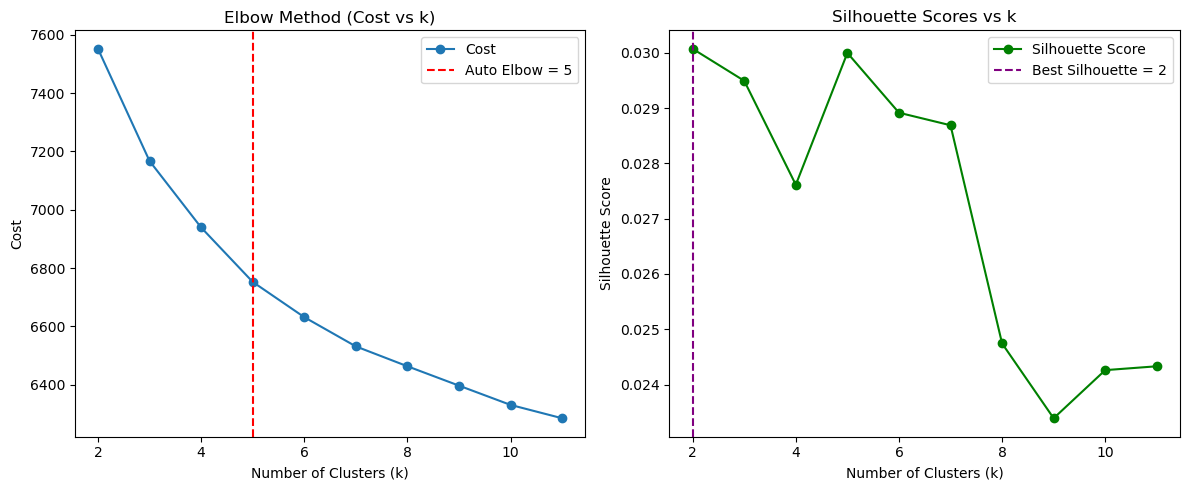

In [7]:
import time

start = time.time()
elbow_k, best_k_silhouette, costs, silhouettes = evaluate_k_sequential(df_set_valued, features)
end = time.time()

print(f"\n✅ Evaluation done in {end - start:.2f} seconds")

import matplotlib.pyplot as plt
from kneed import KneeLocator

ks = list(range(2, 12))  # Must match min_k to max_k

# Find automatic elbow point using KneeLocator
knee = KneeLocator(ks, costs, curve='convex', direction='decreasing')
auto_elbow_k = knee.knee

print(f"📌 Manual Elbow k (min cost) = {elbow_k}")
print(f"📌 Auto Elbow k (KneeLocator) = {auto_elbow_k}")
print(f"📌 Best Silhouette k = {best_k_silhouette}")

# Plot Elbow and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Plot (Cost vs k)
plt.subplot(1, 2, 1)
plt.plot(ks, costs, marker='o', label='Cost')
if auto_elbow_k:
    plt.axvline(auto_elbow_k, color='r', linestyle='--', label=f'Auto Elbow = {auto_elbow_k}')
plt.title("Elbow Method (Cost vs k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.legend()

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes, marker='o', color='green', label='Silhouette Score')
plt.axvline(best_k_silhouette, color='purple', linestyle='--', label=f'Best Silhouette = {best_k_silhouette}')
plt.title("Silhouette Scores vs k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
profiles = get_cluster_profiles(df_set_valued, features, 5)
df_profiles = save_cluster_profiles_to_csv(profiles, "profiles.csv")
df_labeled = label_and_save_dataset(df_set_valued, features, 5, "labeled_data.csv")

▶ encode_data_fast()
◀ encode_data_fast()
▶ sv_k_modes(k=5)
▶ gicca_initialization_vectorized(k=5)
▶ compute_density_matrix()
▶ pairwise_jaccard_vectorized()
◀ pairwise_jaccard_vectorized()
◀ compute_density_matrix()
  first center idx = 9922
  selecting center #2
▶ pairwise_jaccard_cross()
◀ pairwise_jaccard_cross()
   added center idx = 9705
  selecting center #3
▶ pairwise_jaccard_cross()
◀ pairwise_jaccard_cross()
   added center idx = 1525
  selecting center #4
▶ pairwise_jaccard_cross()
◀ pairwise_jaccard_cross()
   added center idx = 6260
  selecting center #5
▶ pairwise_jaccard_cross()
◀ pairwise_jaccard_cross()
   added center idx = 2402
◀ gicca_initialization_vectorized()
 ↳ iter 1
▶ assign_clusters(n=10000, k=5)
◀ assign_clusters() cost=6226.6426
▶ hafsm(cluster_size=3125)
◀ hafsm()
▶ hafsm(cluster_size=1942)
◀ hafsm()
▶ hafsm(cluster_size=1518)
◀ hafsm()
▶ hafsm(cluster_size=1931)
◀ hafsm()
▶ hafsm(cluster_size=1484)
◀ hafsm()
 ↳ iter 2
▶ assign_clusters(n=10000, k=5)
◀ ass

In [3]:
# 1) Prepare your DataFrame and records list
df = pd.DataFrame(df_set_valued)
records = df.to_dict('records')
features = list(df.columns)

# 2) Encode + cluster **once** with your chosen k
X, _ = encode_data(df)                              # fast, vectorized one-hot
clusters, centers, cost = sv_k_modes(records, X, 6, features)
print(f"Clustering complete (cost={cost:.4f})")

# 3) Export the centroids to CSV
df_profiles = save_profiles_from_centers(centers, "profiles_10000_6_v2.csv")
print("Profile has been saved!")
# 4) Append cluster labels to your original DataFrame and save
df_labeled = label_df_from_clusters(df, records, clusters, "data_10000_6_v2.csv")
print("Dataset label has been saved!")

Clustering complete (cost=6631.4167)
Profile has been saved!
Dataset label has been saved!


In [12]:
import pandas as pd

# --- Step 1: Mapping dictionaries (unchanged) ---
produk_map = {
    'Novel Fiksi': 'Novel Fiksi',
    'Buku Non-Fiksi (Pengembangan Diri, Bisnis, dll.)': 'Buku Non-Fiksi',
    'Buku Pelajaran/Edukasi (Termasuk Latihan Soal, Kamus)': 'Edukasi',
    'Komik/Novel Grafis': 'Komik',
    'Buku Anak': 'Buku Anak',
    'Perlengkapan Seni/Kreatif': 'Alat Seni',
    'Alat Musik': 'Alat Seni',
    'Alat Tulis Umum (Kantor/Sekolah)': 'Alat Kantor/Sekolah',
    'Jurnal/Perencana (Planner)': 'Alat Kantor/Sekolah',
    'Perlengkapan Kantor atau Sekolah': 'Alat Kantor/Sekolah',
    'Mainan/Collectible item': 'Sport & mainanan',
    'Alat Olahraga': 'Sport & mainanan'
}

hobi_map = {
    'Membaca buku atau majalah': 'Literasi',
    'Menulis (diari, blog, atau lainnya)': 'Literasi',
    'Melukis atau menggambar': 'Seni',
    'Bermain musik': 'Seni',
    'Bermain game (offline/online)': 'Aktivitas Rekreasional',
    'Olahraga': 'Aktivitas Rekreasional',
    'Menghadiri acara budaya atau edukasi': 'Aktivitas Rekreasional',
    'Belanja online/offline': 'Lifestyle',
    'Travelling': 'Lifestyle'
}

minat_map = {
    'Buku fiksi (novel, komik, buku anak)': 'edukasi',
    'Buku non-fiksi (pengembangan diri, sejarah, agama)': 'edukasi',
    'Buku Edukasi (Buku Teks, Latihan Soal, Kamus)': 'edukasi',
    'Alat Musik & kesenian': 'Alat Seni',
    'Mainan': 'Self Wear',
    'Alat Olahraga': 'Self Wear',
    'Alat Tulis kantor atau sekolah': 'Daily needs',
    'Kesehatan dan Kecantikan': 'Self Wear'
}

# --- Step 2: Debug-enabled mapping function ---
def map_concatenated_values(cell, mapping_dict, row_idx=None, col_name=None):
    if pd.isna(cell):
        return cell
    original = str(cell)
    items = [item.strip() for item in original.split(';')]
    mapped_items = [mapping_dict.get(item, item) for item in items]
    result = ';'.join(sorted(set(mapped_items)))

    # --- Debug output ---
    if row_idx is not None and row_idx < 5:  # limit print to first 5 rows per column
        print(f"\n[DEBUG] Row {row_idx} | Column '{col_name}'")
        print(f"Original cell: {original}")
        print(f"Split items  : {items}")
        print(f"Mapped items : {mapped_items}")
        print(f"Final result : {result}")
    
    return result

# --- Step 3: Process CSVs ---
file_paths = {
    'data_10000_6_v2.csv': 'data_10000_6_v2_mapped.csv',
    'profiles_10000_6_v2.csv': 'profiles_10000_6_v2_mapped.csv'
}

for input_file, output_file in file_paths.items():
    print(f"\n\n🚀 Processing file: {input_file}")
    df = pd.read_csv(input_file)
    df.columns = df.columns.str.strip()  # Normalize column names
    print(f"📄 Columns in {input_file}: {list(df.columns)}")  # Check actual names

    for col, mapper in zip(['Produk sering beli', 'Hobi', 'Minat'], [produk_map, hobi_map, minat_map]):
        if col in df.columns:
            print(f"\n🔍 Mapping column: {col}")
            df[col] = df.apply(
                lambda row: map_concatenated_values(row[col], mapper, row_idx=row.name, col_name=col),
                axis=1
            )
        else:
            print(f"⚠️ Column '{col}' NOT FOUND in {input_file}")

    df.to_csv(output_file, index=False)
    print(f"✅ Saved updated file to: {output_file}")




🚀 Processing file: data_10000_6_v2.csv
📄 Columns in data_10000_6_v2.csv: ['Produk sering beli', 'Saluran belanja', 'Motivasi utama pembelian', 'Hobi', 'Minat', 'Pernyataan: Membaca adalah bagian penting dari pengembangan diri saya', 'Pernyataan: Saya sering mencari inspirasi untuk kegiatan kreatif dari buku atau alat tulis', 'Pernyataan: Saya berusaha menerapkan gaya hidup minimalis dalam hal kepemilikan barang', 'Pernyataan: Saya nyaman menggunakan teknologi digital untuk membaca dan mencatat', 'cluster']

🔍 Mapping column: Produk sering beli

[DEBUG] Row 0 | Column 'Produk sering beli'
Original cell: Buku Anak;Buku Non-Fiksi (Pengembangan Diri, Bisnis, dll.);Novel Fiksi
Split items  : ['Buku Anak', 'Buku Non-Fiksi (Pengembangan Diri, Bisnis, dll.)', 'Novel Fiksi']
Mapped items : ['Buku Anak', 'Buku Non-Fiksi', 'Novel Fiksi']
Final result : Buku Anak;Buku Non-Fiksi;Novel Fiksi

[DEBUG] Row 1 | Column 'Produk sering beli'
Original cell: Komik/Novel Grafis
Split items  : ['Komik/Novel